In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

In [2]:
def groupby_table(df, columns, order = True):
    counts = df.groupby(columns).size().reset_index(name='counts')
    counts = counts.drop(counts[(counts.counts == 0) | (counts.counts.isnull())].index)
    
    if order:
        counts.sort_values(columns, inplace=True)
    else:
        counts.sort_values(['counts'], ascending=[False], inplace=True)
        
    return counts

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic = sns.load_dataset('titanic')
df = titanic.copy()
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
survived = groupby_table(df, ['survived'], False)
display(survived)

,survived,counts
0,0,549
1,1,342


In [6]:
alone = groupby_table(df, ['alone'], False)
display(alone)

,alone,counts
1,True,537
0,False,354


In [7]:
dict_yes_no = {True : 'yes', False: 'no'}
df.replace({'alone': dict_yes_no}, inplace=True)
alone = groupby_table(df, ['alone'], False)
display(alone)

,alone,counts
1,yes,537
0,no,354


In [8]:
dict_yes_no = {True : 'yes', False: 'no'}
df.replace({'adult_male': dict_yes_no}, inplace=True)
adult_male = groupby_table(df, ['adult_male'], False)
display(adult_male)

,adult_male,counts
1,yes,537
0,no,354


In [9]:
alive = groupby_table(df, ['survived', 'alive'], False)
display(alive)

,survived,alive,counts
0,0,no,549
1,1,yes,342


In [10]:
pclass = groupby_table(df, ['pclass', 'class'], True)
display(pclass)

,pclass,class,counts
0,1,First,216
4,2,Second,184
8,3,Third,491


In [11]:
embarked = groupby_table(df, ['embark_town', 'embarked'], True)
display(embarked)

,embark_town,embarked,counts
0,Cherbourg,C,168
1,Queenstown,Q,77
2,Southampton,S,644


In [12]:
df.drop(columns=['pclass', 'embarked', 'alive'], inplace=True)
display(df)

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,yes,NaN,Southampton,no
1,1,female,38.0,1,0,71.2833,First,woman,no,C,Cherbourg,no
2,1,female,26.0,0,0,7.9250,Third,woman,no,NaN,Southampton,yes
3,1,female,35.0,1,0,53.1000,First,woman,no,C,Southampton,no
4,0,male,35.0,0,0,8.0500,Third,man,yes,NaN,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,man,yes,NaN,Southampton,yes
887,1,female,19.0,0,0,30.0000,First,woman,no,B,Southampton,yes
888,0,female,NaN,1,2,23.4500,Third,woman,no,NaN,Southampton,no
889,1,male,26.0,0,0,30.0000,First,man,yes,C,Cherbourg,yes


In [13]:
df_dummies = pd.get_dummies(df, drop_first = True)
display(df_dummies)

,survived,age,sibsp,parch,fare,sex_male,class_Second,class_Third,who_man,who_woman,adult_male_yes,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alone_yes
0,0,22.0,1,0,7.2500,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1
887,1,19.0,0,0,30.0000,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1
888,0,NaN,1,2,23.4500,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
889,1,26.0,0,0,30.0000,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
columns = df_dummies.columns.to_list()
target = 'survived'
d_columns = columns.copy()
d_columns.remove(target)

In [16]:
df_dummies_dropna = df_dummies.dropna()
features = df_dummies_dropna[d_columns]
labels = df_dummies_dropna[[target]]
display(features)
display(labels)

,age,sibsp,parch,fare,sex_male,class_Second,class_Third,who_man,who_woman,adult_male_yes,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alone_yes
0,22.0,1,0,7.2500,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,38.0,1,0,71.2833,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1
3,35.0,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,35.0,0,0,8.0500,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
886,27.0,0,0,13.0000,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1
887,19.0,0,0,30.0000,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1
889,26.0,0,0,30.0000,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1


,survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [17]:
select = SelectKBest(chi2, k=5)
select.fit_transform(features, labels)
best_features = select.get_feature_names_out()
print(best_features)

['fare' 'sex_male' 'who_man' 'who_woman' 'adult_male_yes']


[Text(0.5, 1.0, 'Feature importances using k highest scores')]

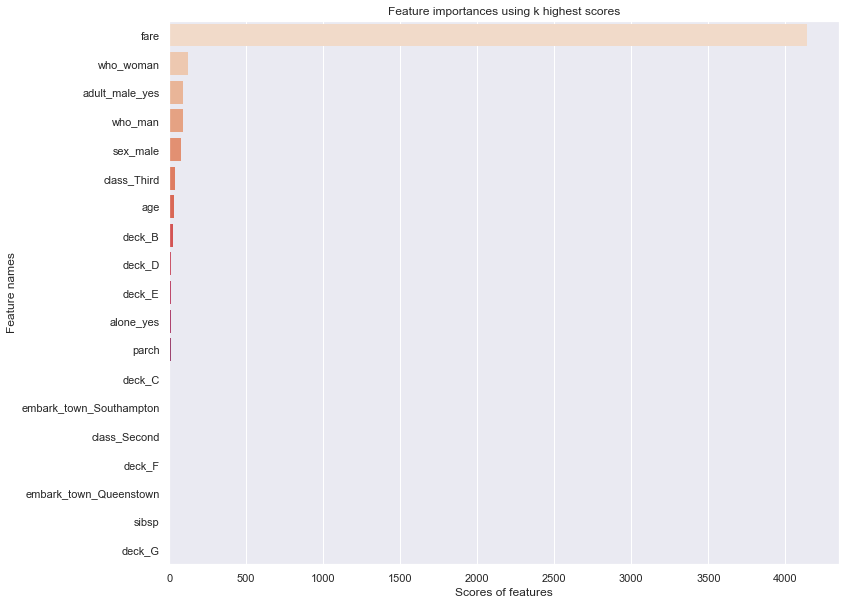

In [18]:
select_importances = pd.Series(
    select.scores_, index=select.feature_names_in_
).sort_values(ascending=False)

select_importances = pd.DataFrame(select_importances)
select_importances = select_importances.reset_index()
select_importances.rename(columns={'index': 'feature_names', 0: 'score'}, inplace=True)

n_plots = len(select_importances['feature_names'].values)

palette = sns.color_palette('rocket', n_colors=n_plots)
palette.reverse()

sns.set(rc = {'figure.figsize':(12,10)})
p = sns.barplot(data=select_importances, x='score', y='feature_names', palette = palette, edgecolor = 'none')
p.set(xlabel = 'Scores of features', ylabel = 'Feature names')
p.set(title='Feature importances using k highest scores')

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm

In [20]:
features = df_dummies[best_features]
labels = df_dummies[[target]]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = labels)

In [22]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=6, random_state=0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=50,
                           random_state=0)

In [23]:
y_pred = gbc.predict(x_test)

In [24]:
# compute confusion_matrix
cm = skm.confusion_matrix(y_test, y_pred)
print(cm)

[[150  15]
 [ 42  61]]


In [25]:
# compute classification
print(skm.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       165
           1       0.80      0.59      0.68       103

    accuracy                           0.79       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.79      0.79      0.78       268



In [26]:
report = skm.classification_report(y_test, y_pred, output_dict=True)
f1_score_1 = report['1']['f1-score']

print('F1-score: ' +str(f1_score_1))

F1-score: 0.6815642458100559


In [27]:
import matplotlib.pyplot as plt

In [28]:
y_score = gbc.predict_proba(x_test)
y_score = y_score[:,1]

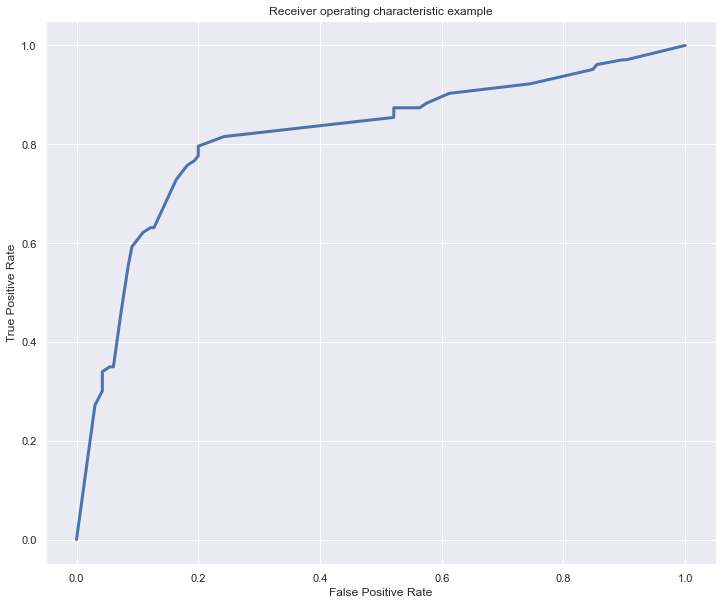

In [29]:
fpr, tpr, thresholds = skm.roc_curve(y_test, y_score, pos_label=1)

plt.plot(fpr, tpr, lw=3)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

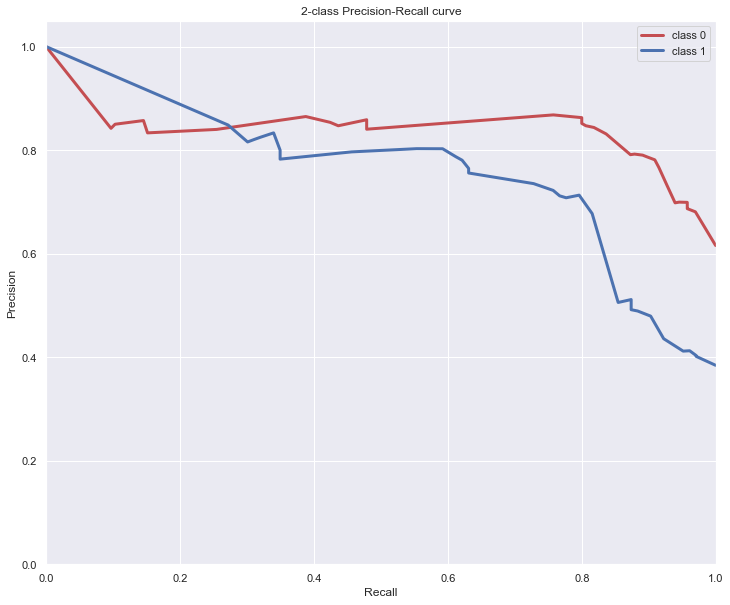

In [30]:
precision0, recall0, tresholds0 = skm.precision_recall_curve(y_test, 1-y_score, pos_label=0)
precision1, recall1, tresholds1 = skm.precision_recall_curve(y_test, y_score, pos_label=1)

#%% plot curve
plt.plot(recall0, precision0, 'r', lw=3, label='class 0')
plt.plot(recall1, precision1, 'b', lw=3, label='class 1')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend()
plt.show()   